# Importing Data

In [1]:
import pandas as pd
df = pd.read_csv('toi.csv')
df.head()

,Title,Content
0,Go to Life’s lesson from this pandemic,[<p>I still remember – It was that one of thos...
1,Go to Is Delhi NCR Winter Ready?,[<p>While a lockdown was imposed by the Govern...
2,Go to Why we need to worry about Climate Change?,[<p>If I recall a few natural disasters from t...
3,Go to Energy security and behavior change,[<p>The ways of balancing the supply and deman...
4,Go to Sustainable Production,[<p>Humans have been consuming resources at an...


In [2]:
temp = []
for i in df['Content']:
    temp.append((i.replace('<p>','')).strip(']['))
df['Content'] = temp

# Import necessary libraries

In [3]:
# General
import os
import re
import sklearn
import nltk
import numpy as np
import contractions
import pickle
# Preprocessing
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
# models
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
import fastcluster
from scipy.cluster.hierarchy import dendrogram, cophenet
from scipy.spatial.distance import pdist
# Plots
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn
import seaborn as sns
# Enable inline plotting  
%matplotlib inline

# Feature Extraction 

In [4]:
corpus = df['Content']
def featureextraction(corpus):
    
    vectorizer = TfidfVectorizer(max_df=.5,min_df=1,max_features=None,ngram_range=(1, 2),norm=None,binary=True,
                             use_idf=False,sublinear_tf=False,strip_accents = 'unicode',stop_words = 'english')
    vectorizer = vectorizer.fit(corpus)
    tfidf = vectorizer.transform(corpus)
    vocab = vectorizer.get_feature_names()

    return tfidf, vocab

In [5]:
tfidf, vocab = featureextraction(corpus)

In [6]:
len(vocab)

5873

In [7]:
np.shape(tfidf)

(10, 5873)

# Agglomerative Hierarchical Clustering

In [8]:
pca = PCA(n_components=10).fit_transform(tfidf.todense())
pca

array([[-3.97115547e+00, -3.28468759e+00, -3.19119745e+00,
        -1.28546546e+01,  1.71275093e+01,  2.44099316e+00,
        -5.09693232e+00, -4.09670911e+00, -1.33906649e+00,
         9.72769146e-14],
       [-4.80578071e+00, -5.00127471e+00,  2.40137034e+01,
         6.91615877e+00,  2.18338058e+00,  4.65136830e-01,
        -1.44529152e+00, -1.18917593e+00, -7.51004942e-01,
         9.72769146e-14],
       [-3.20507676e+00, -2.55065612e+00, -1.37928471e+00,
        -4.18880468e+00, -2.83632960e+00, -1.64007877e+00,
         1.85058054e+01, -6.44994049e+00, -2.14986852e+00,
         9.72769146e-14],
       [-5.04973553e+00, -5.86595994e+00, -1.21569743e+01,
         1.99403142e+01,  5.12546724e+00,  1.94446587e-01,
        -1.12666372e+00, -1.80052723e+00, -9.55530100e-01,
         9.72769146e-14],
       [-3.63997654e+00, -2.86317004e+00, -2.48735601e+00,
        -4.38542861e+00, -9.79201342e+00, -1.54759779e+01,
        -8.66010753e+00, -4.12131831e+00, -1.67683020e+00,
         9.

In [9]:
Z = fastcluster.linkage_vector(pca,method='ward', metric='euclidean')
Z

array([[ 7.        ,  8.        , 22.64950331,  2.        ],
       [ 2.        , 10.        , 28.33725463,  3.        ],
       [ 4.        , 11.        , 30.757113  ,  4.        ],
       [ 5.        , 12.        , 31.73011188,  5.        ],
       [ 0.        , 13.        , 33.65313259,  6.        ],
       [ 3.        , 14.        , 36.79803307,  7.        ],
       [ 1.        , 15.        , 38.51066643,  8.        ],
       [ 9.        , 16.        , 41.67799846,  9.        ],
       [ 6.        , 17.        , 50.92587205, 10.        ]])

In [10]:
from scipy.cluster.hierarchy import fcluster
distance_threshold = 20
clusters = fcluster(Z, distance_threshold, criterion='distance')

In [11]:
len(clusters)

10

In [12]:
from collections import Counter

In [13]:
count = Counter(clusters)

In [14]:
count

Counter({6: 1, 8: 1, 3: 1, 7: 1, 4: 1, 5: 1, 10: 1, 1: 1, 2: 1, 9: 1})

In [15]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    df.columns = labels

    for i,r in df.iterrows():
        label_new = list(df.columns[np.argsort(df.iloc[i-1])])
        dd = pd.DataFrame([np.argsort(df.iloc[i-1])],columns=label_new)
        wordcloud = WordCloud(background_color = 'white')
        wordCloud = wordcloud.generate_from_frequencies(dd.iloc[0,-200:])
        plt.figure(figsize=(8, 8))
        plt.imshow(wordCloud)
        plt.axis("off")
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))


Cluster 1
engage,engage motive,engage ourself,path,path covid,family friends,going,going path,family busy,family,good,good exercises,enjoy,enjoy acceptance,enjoy happiness,atmosphere,atmosphere hope,hoping fresh,hoping,survive

Cluster 2
death,pain sadness,pain,death watching,tough,tough isn,wilderness,wilderness dwell,education feel,wilderness watch,mere,lions,lions tigers,educational purposes,educational,education zoo,purposes,purposes education,mere source,en caged

Cluster 3
unprecedented,changing,changes frequency,changes disrupting,understanding predicting,long gone,long,high rate,change happening,glaciers permafrost,global,pollution lead,glacial melting,glacial,models,models understanding,change won,changes,glaciers,belief

Cluster 4
environmental impact,environmental,environment sustainable,data,data reports,make affect,make,tool,cycle assessment,tool choice,tool used,biodegradable degrade,biodegradable,biodegradability renewability,biodegradability,bio based,bio,environment f

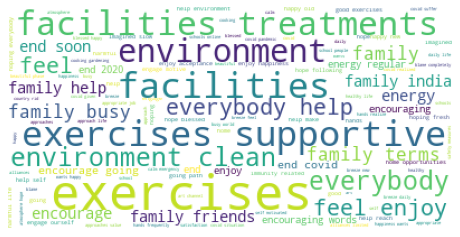

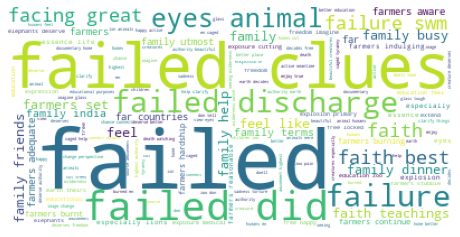

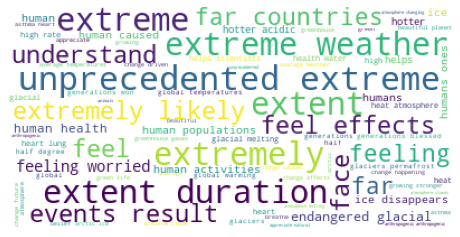

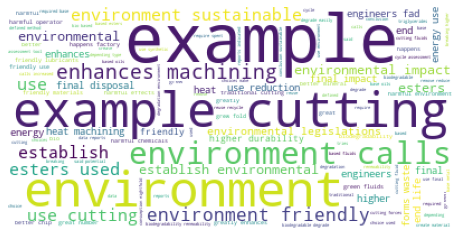

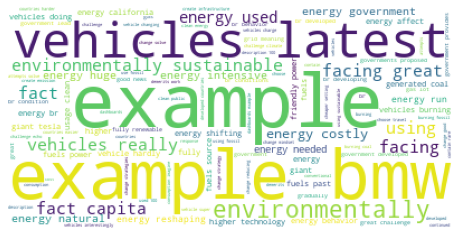

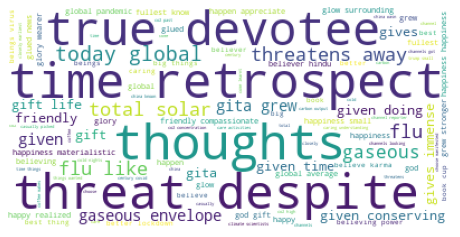

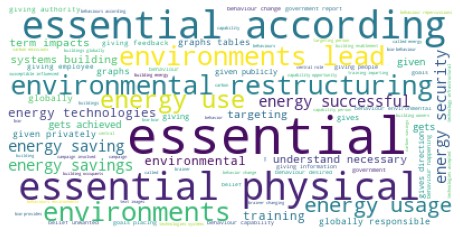

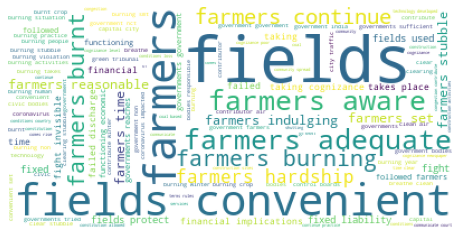

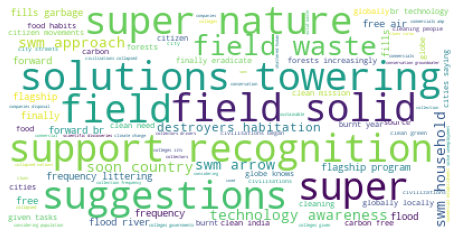

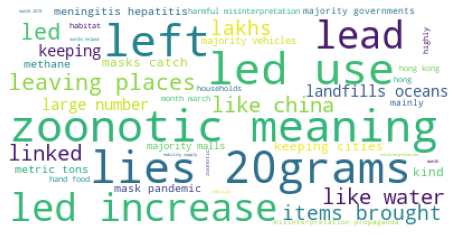

In [17]:
get_top_keywords(tfidf, clusters, vocab, 20)

<AxesSubplot:title={'center':'Top 20 bigrams - India'}, xlabel='Text'>

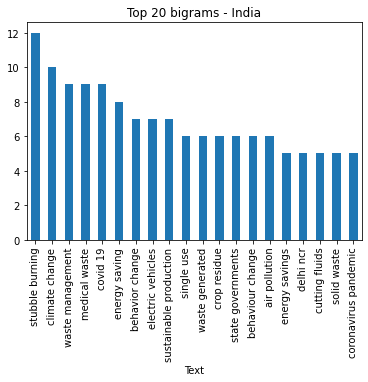

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(corpus, 20)
df4 = pd.DataFrame(common_words, columns = ['Text' , 'count'])
df4.groupby('Text').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', title='Top 20 bigrams - India')

In [19]:
common_words

[('stubble burning', 12),
 ('climate change', 10),
 ('covid 19', 9),
 ('waste management', 9),
 ('medical waste', 9),
 ('energy saving', 8),
 ('behavior change', 7),
 ('sustainable production', 7),
 ('electric vehicles', 7),
 ('air pollution', 6),
 ('crop residue', 6),
 ('state governments', 6),
 ('behaviour change', 6),
 ('waste generated', 6),
 ('single use', 6),
 ('delhi ncr', 5),
 ('energy savings', 5),
 ('cutting fluids', 5),
 ('coronavirus pandemic', 5),
 ('solid waste', 5)]

In [20]:
def get_top_n_trigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(3, 3), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
def plot_trigrams(common_words,title):
    import matplotlib
    fig, ax = plt.subplots(1, 1, figsize=(6, 6))
    matplotlib.rcParams['legend.fontsize'] = 60
    plt.style.use('ggplot')
    sns.set_style('ticks')   
    df6 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
    df6.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
        kind='bar', title='Top 20 trigrams-India')
    plt.tight_layout()
    ax.yaxis.grid(which='major',linestyle=':', linewidth='0.5', color='black')

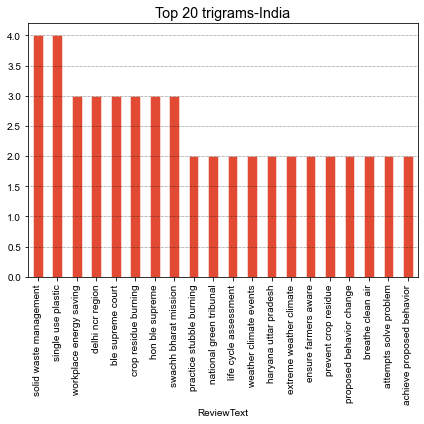

In [21]:
common_words = get_top_n_trigram(corpus, 20)
plot_trigrams(common_words,'India')

In [22]:
from nltk.collocations import BigramCollocationFinder, BigramAssocMeasures
from collections import defaultdict
from nltk.corpus import stopwords 
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
def bigram_coocurrence(corp):
    stopset = set(stopwords.words('english')) 
    filter_stops = lambda w: len(w) < 3 or w in stopset
    bi_dict = defaultdict(int)
    bg_measures = BigramAssocMeasures()
    for readme in corp:
        words = nltk.word_tokenize(readme)
        bi_finder = BigramCollocationFinder.from_words(words)
        bi_finder.apply_word_filter(filter_stops) 
        bi_collocs = bi_finder.nbest(bg_measures.likelihood_ratio, 10)    
        for colloc in bi_collocs:
            bi_dict[colloc] += 1       
    return bi_dict
def colocate_clouds(corp,title):
    fig = plt.figure(figsize=(15,10))
    ax = fig.add_subplot(1,1,1)
    bi_dict = bigram_coocurrence(corp)            
    dd = pd.DataFrame.from_dict(bi_dict,orient='index',dtype='str')
    dff = dd.T
    dff.columns = [str(" ".join(x)) for x in list(dff.columns)]
    dff = dff.astype(int)
    dff = dff.sort_values(by=0,ascending=True, axis=1)
    wordcloud = WordCloud(background_color = 'white',width=1600, height=800)
    wordCloud = wordcloud.generate_from_frequencies(dff.iloc[0,-200:])
    plt.imshow(wordCloud)
    plt.axis("off")

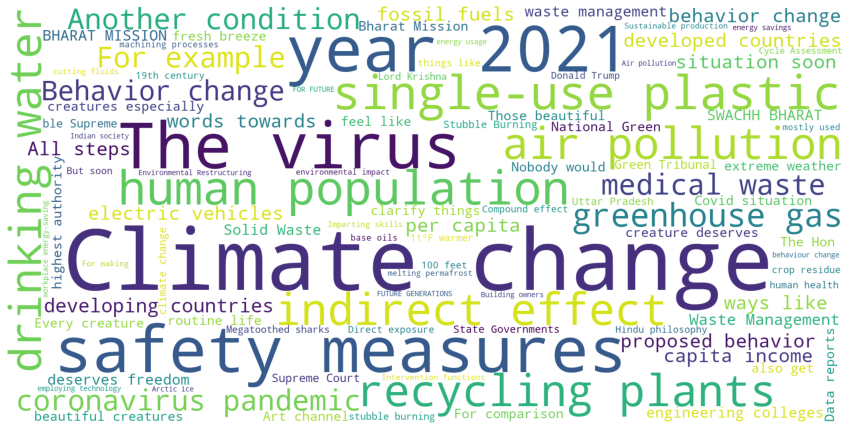

In [23]:
colocate_clouds(corpus,'India')

In [24]:
import networkx as nx
import matplotlib
def graph_plots(s,title):
    matplotlib.rcParams['legend.fontsize'] = 9
    plt.style.use('ggplot')
    sns.set_style('ticks')
    G = nx.Graph()
    for k, v in s.items():
        G.add_edge(k[0], k[1], weight=(v * 10))
    fig, ax = plt.subplots(figsize=(15, 10))
    pos = nx.spring_layout(G, k=2)
    nx.draw_networkx(G, pos,
                     font_size=16,
                     width=3,
                     edge_color='grey',
                     node_color='purple',
                     with_labels = False,
                     ax=ax)
    for key, value in pos.items():
        x, y = value[0]+.05, value[1]+.03
        ax.text(x, y,
                s=key,
                bbox=dict(facecolor='red', alpha=0.25),
                horizontalalignment='center', fontsize=16)
    plt.tight_layout()
    plt.show()

In [25]:
bi_dict_India = bigram_coocurrence(corpus)

In [26]:
bi_dict_India

defaultdict(int,
            {('The', 'virus'): 1,
             ('things', 'like'): 1,
             ('100', 'feet'): 1,
             ('11°F', 'warmer'): 1,
             ('But', 'soon'): 1,
             ('Compound', 'effect'): 1,
             ('Donald', 'Trump'): 1,
             ('Hindu', 'philosophy'): 1,
             ('Lord', 'Krishna'): 1,
             ('Megatoothed', 'sharks'): 1,
             ('crop', 'residue'): 1,
             ('stubble', 'burning'): 1,
             ('Uttar', 'Pradesh'): 1,
             ('State', 'Governments'): 1,
             ('Stubble', 'Burning'): 1,
             ('ble', 'Supreme'): 1,
             ('Supreme', 'Court'): 1,
             ('Green', 'Tribunal'): 1,
             ('National', 'Green'): 1,
             ('The', 'Hon'): 1,
             ('extreme', 'weather'): 1,
             ('climate', 'change'): 1,
             ('Climate', 'change'): 2,
             ('human', 'health'): 1,
             ('melting', 'permafrost'): 1,
             ('19th', 'century'): 

In [27]:
s_India = dict(sorted(bi_dict_India.items(), key=lambda x: x[1], reverse=True)[:25])

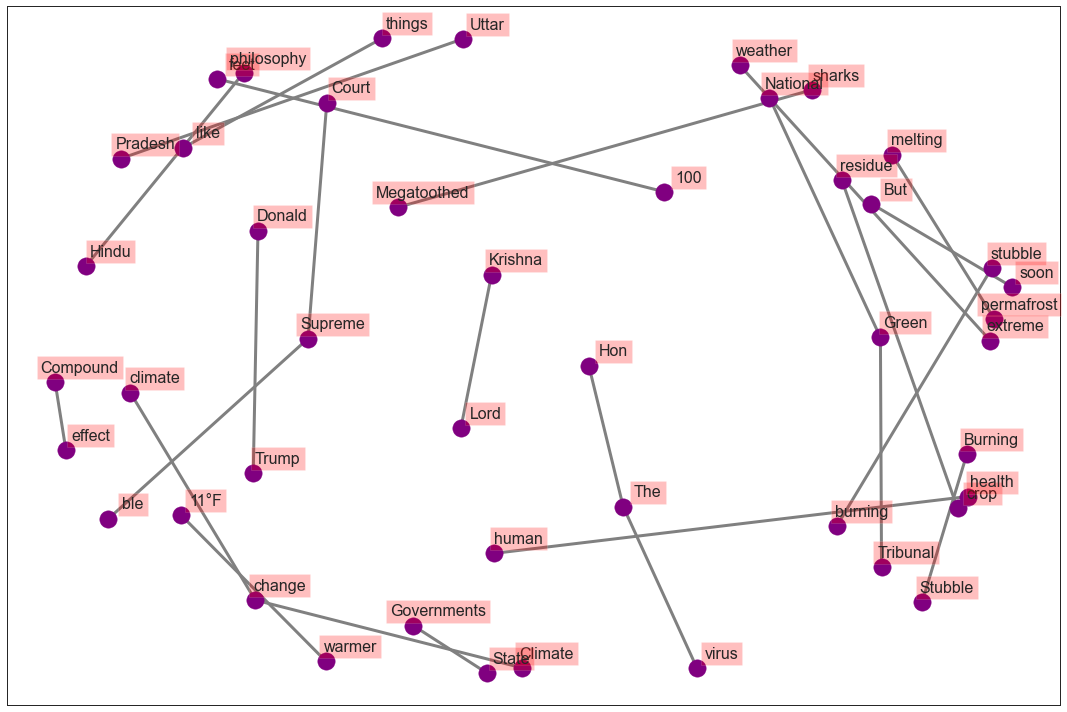

In [28]:
graph_plots(s_India,'India')

# NER Visualization

In [29]:
import spacy
m = spacy.load("en_core_web_sm")

In [30]:
for i in range(len(df['Content'])):
    print(i)
    for ent in m(df['Content'][i]).ents:
        
        print(ent.text,ent.label_)

0
one CARDINAL
nights of November DATE
Televisions ORG
Corona PERSON
Wuhan GPE
China</p> ORG
Wuhan GPE
China GPE
late January DATE
the first days of January DATE
January 2020 DATE
Corona PERSON
Corona PERSON
Crown ORG
Hindu NORP
Karma GPE
CO2 ORG
Earth LOC
up to 100 feet QUANTITY
today DATE
11 CARDINAL
CO2 ORG
activities?</p> ORG
Nature’s Law Of Balance.</p> WORK_OF_ART
CO2 ORG
the past century DATE
a few short months DATE
Teachings ORG
Gita PERSON
Donald Trump PERSON
Krishna PERSON
The Power Of Magic and Faith WORK_OF_ART
1
the Government of India ORG
March 2020 DATE
19.</p CARDINAL
winter DATE
Delhi NCR ORG
winter DATE
Delhi GPE
one CARDINAL
Stubble Burning ORG
the Courts and Tribunals ORG
every year DATE
One CARDINAL
India GPE
the State of NCT GPE
Delhi GPE
Haryana GPE
Punjab GPE
Uttar GPE
Stubble Burning GPE
Article 21 of the Indian Constitution LAW
the year 2018 DATE
National Green Tribunal ORG
NGT ORG
New Delhi GPE
Smt GPE
Ganga Lalwani V. Union PERSON
India GPE
Ors GPE
The Natio

In [31]:
from spacy import displacy

In [32]:
for i in range(len(df['Content'])):
    doc = m(df['Content'][i])
    displacy.render(doc,style='ent')